<a href="https://colab.research.google.com/github/febriantimayori/PCVK_Ganjil_2024/blob/main/Week12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MODUL 12 – Feature Matching, Face Detection, Face Tracking**

---


> Nama: Febrianti Mayori

> NIM: 2241720248

> Kelas: TI-3D

## **TUGAS PRAKTIKUM**

---


**1. Buka Google Colab, kemudian import beberapa library dan akses folder yang ada di Drive Anda dengan seperti biasa.**

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


**2. Lakukan Face Detection untuk image object lain yang tersedia pada (/images/facedet).**

Tampilkan seperti pada contoh berikut.

Deteksi wajah digambar: jokowi.jpg


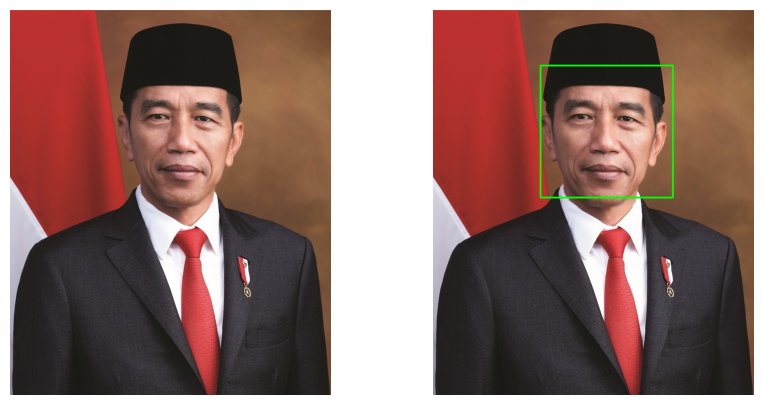

Deteksi wajah digambar: kartini.jpg


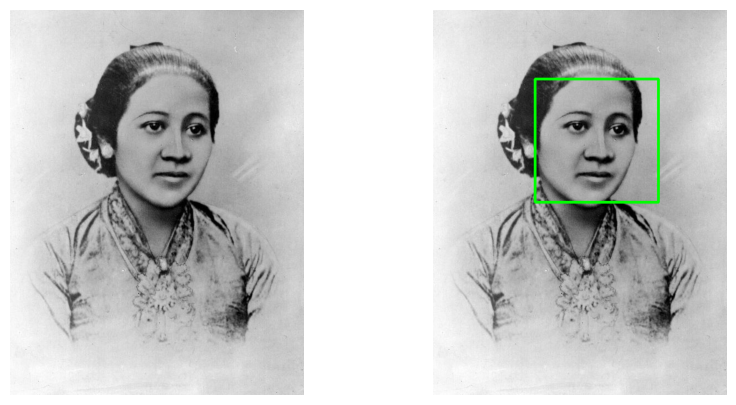

Deteksi wajah digambar: kucing.jpg


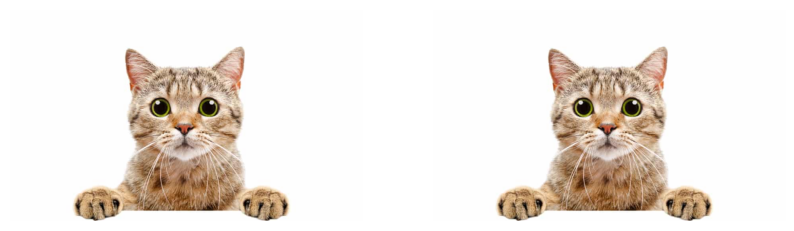

Deteksi wajah digambar: mask.png


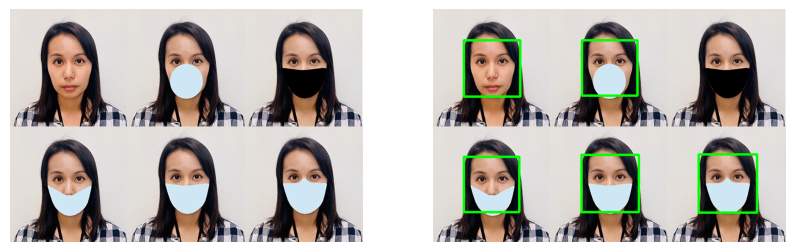

Deteksi wajah digambar: mjordan.jpg


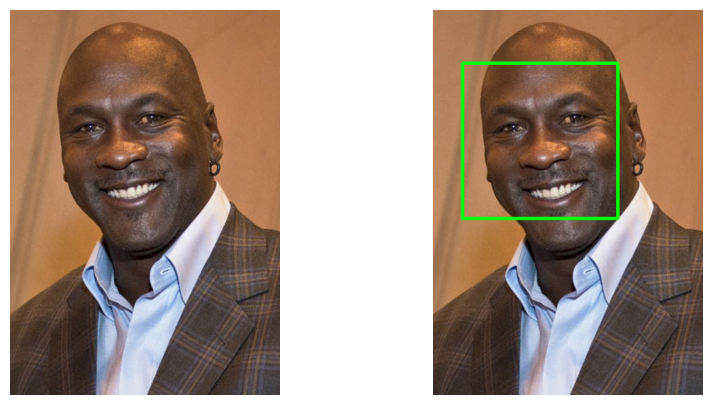

Deteksi wajah digambar: solvayconf.jpg


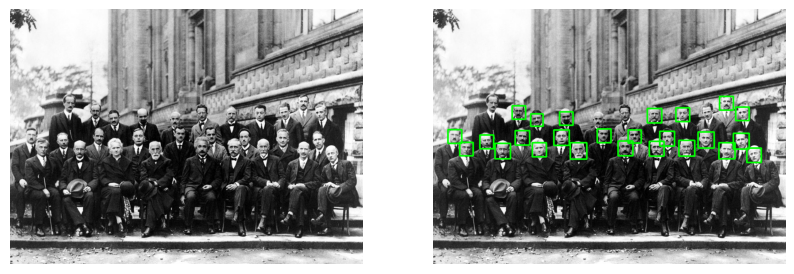

In [ ]:
# Memuat file Haar Cascade untuk deteksi wajah
cascade_wajah = cv.CascadeClassifier('/content/drive/MyDrive/PCVK/Images/haarcascades/haarcascade_frontalface_alt.xml')

# Daftar path gambar
path_gambar = [
    '/content/drive/MyDrive/PCVK/Images/facedet/jokowi.jpg',
    '/content/drive/MyDrive/PCVK/Images/facedet/kartini.jpg',
    '/content/drive/MyDrive/PCVK/Images/facedet/kucing.jpg',
    '/content/drive/MyDrive/PCVK/Images/facedet/mask.png',
    '/content/drive/MyDrive/PCVK/Images/facedet/mjordan.jpg',
    '/content/drive/MyDrive/PCVK/Images/facedet/solvayconf.jpg'
]

# Iterasi untuk setiap gambar dan terapkan deteksi wajah
for gambar_path in path_gambar:
    # Memuat gambar asli
    gambar_asli = cv.imread(gambar_path)
    gambar_asli_rgb = cv.cvtColor(gambar_asli, cv.COLOR_BGR2RGB)  # Konversi ke RGB untuk tampilan matplotlib

    # Salin gambar untuk deteksi wajah
    gambar_deteksi = gambar_asli.copy()
    gambar_deteksi_rgb = cv.cvtColor(gambar_deteksi, cv.COLOR_BGR2RGB)

    # Mendeteksi wajah pada gambar
    roi_wajah = cascade_wajah.detectMultiScale(gambar_deteksi_rgb, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # Menandai wajah yang terdeteksi dengan kotak
    for (x, y, w, h) in roi_wajah:
        cv.rectangle(gambar_deteksi_rgb, (x, y), (x + w, y + h), (0, 255, 0), 3)

    # Menampilkan informasi di konsol
    judul = 'Deteksi wajah digambar: ' + gambar_path.split('/')[-1]
    print(judul)

    # Menampilkan gambar sebelum dan sesudah deteksi wajah
    plt.figure(figsize=(10, 5))

    # Gambar sebelum deteksi
    plt.subplot(1, 2, 1)
    plt.imshow(gambar_asli_rgb)
    plt.axis('off')

    # Gambar sesudah deteksi
    plt.subplot(1, 2, 2)
    plt.imshow(gambar_deteksi_rgb)
    plt.axis('off')

    # Menampilkan hasil
    plt.show()

Perhatikan pada hasil face detection diatas. Secara keseluruhan, face detection
dapat dilakukan dengan baik, bahkan untuk image berupa gambar bukan foto, wajah
bermasker, atau wajah yang berukuran kecil (solvay).

**3. Pada Soal No.2. wajah kucing tidak bisa dideteksi dengan baik. Lakukan deteksi wajah kucing hingga muncul rectangle pada bagian wajahnya. Petunjuk pada soal ini, perhatikan pretrained features yang telah disediakan OpenCV. Gunakan xml yang ada jika memang telah disediakan. Jika belum ada, coba cari dengan searching melalui search engines.**

Deteksi wajah di gambar: kucing.jpg


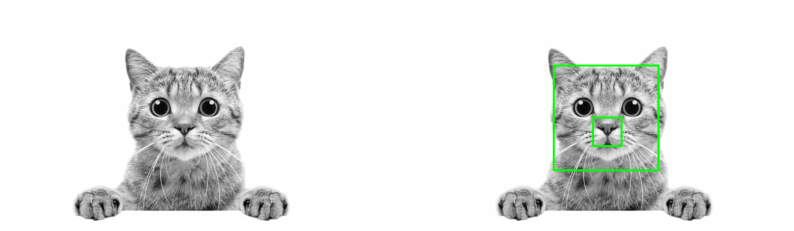

In [ ]:
# Memuat file Haar Cascade untuk deteksi wajah kucing
cascade_kucing = cv.CascadeClassifier('/content/drive/MyDrive/PCVK/Images/haarcascades/haarcascade_frontalcatface_extended.xml')

# Memuat gambar kucing dalam mode grayscale
gambar_kucing = cv.imread('/content/drive/MyDrive/PCVK/Images/facedet/kucing.jpg', cv.IMREAD_GRAYSCALE)

# Menampilkan judul di konsol
judul = 'Deteksi wajah di gambar: kucing.jpg'
print(judul)

# Mendeteksi wajah kucing
roi_kucing = cascade_kucing.detectMultiScale(gambar_kucing, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Menandai wajah kucing yang terdeteksi dengan kotak
gambar_kucing_deteksi = cv.cvtColor(gambar_kucing, cv.COLOR_GRAY2RGB)  # Konversi ke RGB untuk warna rectangle
for i, (x, y, w, h) in enumerate(roi_kucing, start=1):
    cv.rectangle(gambar_kucing_deteksi, (x, y), (x + w, y + h), (0, 255, 0), 3)

# Menampilkan gambar sebelum dan sesudah deteksi
plt.figure(figsize=(10, 5))

# Gambar sebelum deteksi
plt.subplot(1, 2, 1)
plt.imshow(gambar_kucing, cmap='gray')
plt.axis('off')

# Gambar sesudah deteksi
plt.subplot(1, 2, 2)
plt.imshow(gambar_kucing_deteksi)
plt.axis('off')

# Menampilkan plot
plt.show()

**4. Cobakan juga untuk eyes detection pada gambar “Jokowi.jpg”.**

Deteksi mata di gambar: jokowi.jpg


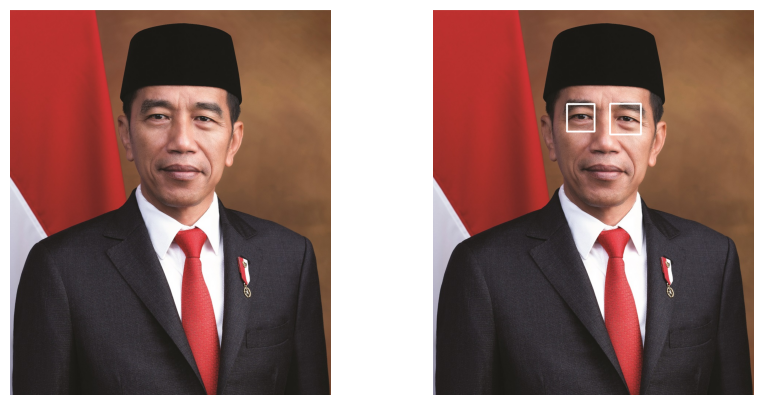

In [ ]:
# Memuat file Haar Cascade untuk deteksi mata
cascade_mata = cv.CascadeClassifier('/content/drive/MyDrive/PCVK/Images/haarcascades/haarcascade_eye.xml')

# Memuat gambar Jokowi
jokowi2 = cv.imread('/content/drive/MyDrive/PCVK/Images/facedet/jokowi.jpg')

# Menampilkan judul di konsol
judul = 'Deteksi mata di gambar: jokowi.jpg'
print(judul)

# Mengonversi gambar ke format RGB
jokowi2_rgb = cv.cvtColor(jokowi2, cv.COLOR_BGR2RGB)

# Mendeteksi mata pada gambar Jokowi
roi_mata = cascade_mata.detectMultiScale(jokowi2_rgb, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Menandai mata yang terdeteksi dengan kotak putih
for (x, y, w, h) in roi_mata:
    cv.rectangle(jokowi2_rgb, (x, y), (x + w, y + h), (255, 255, 255), 3)

# Menampilkan gambar sebelum dan sesudah deteksi mata
plt.figure(figsize=(10, 5))

# Gambar sebelum deteksi mata
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(jokowi2, cv.COLOR_BGR2RGB))
plt.axis('off')

# Gambar sesudah deteksi mata
plt.subplot(1, 2, 2)
plt.imshow(jokowi2_rgb)
plt.axis('off')
plt.show()

**5. Lakukan Face Tracking menggunakan Google Colab. Petunjuk, Tutorial selengkapnya tentang akses kamera dan FaceDetection pada google colab dapat dilihat di link berikut [ini!](https://www.youtube.com/watch?v=YjWh7QvVH60)**.

In [ ]:
# Import library tambahan
import PIL
import io
import html
import time

In [ ]:
def js_to_image(js_reply):
  image_bytes = b64decode(js_reply.split(',')[1])
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  img = cv.imdecode(jpg_as_np, flags=1)

  return img


def bbox_to_bytes(bbox_array):
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  bbox_PIL.save(iobuf, format='png')
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64decode(iobuf.getvalue()), 'utf-8')))

  return bbox_to_bytes

In [ ]:
face_cascade = cv.CascadeClassifier(cv.samples.findFile(cv.data.haarcascades + 'haarcascade_frontalface_default.xml'))

<IPython.core.display.Javascript object>

(480, 640)
Saved to photo.jpg


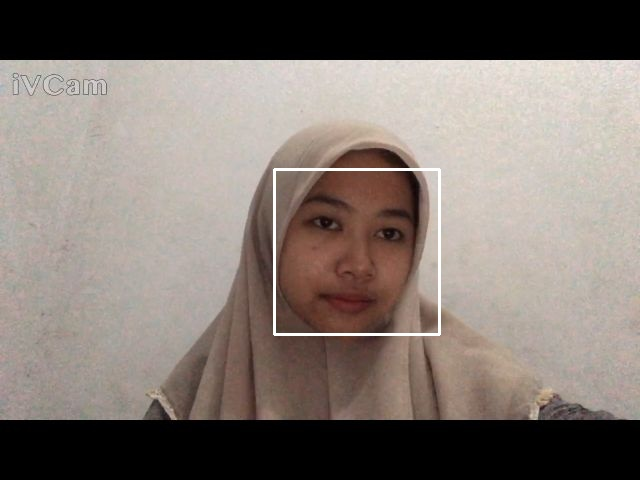

In [67]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality){
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

  data = eval_js('takePhoto({})'.format(quality))
  img = js_to_image(data)
  gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
  print(gray.shape)
  faces = face_cascade.detectMultiScale(gray)
  for(x,y,w,h) in faces:
    img = cv.rectangle(img,(x,y),(x+w,y+h),(255, 255, 255),2)

  cv.imwrite(filename, img)

  return filename

try:
  filename = take_photo('photo.jpg')
  print('Saved to {}'.format(filename))

  display(Image(filename))
except Exception as err:
  print(str(err))

**6. Lakukan Blurring pada bagian wajah yang terdeteksi pada gambar "mjordan.jpg"**.

Petunjuk: anda dapat menggunakan cv.medianBlur untuk melakukan Blurring

Efek blurring pada wajah di gambar: mjordan.jpg


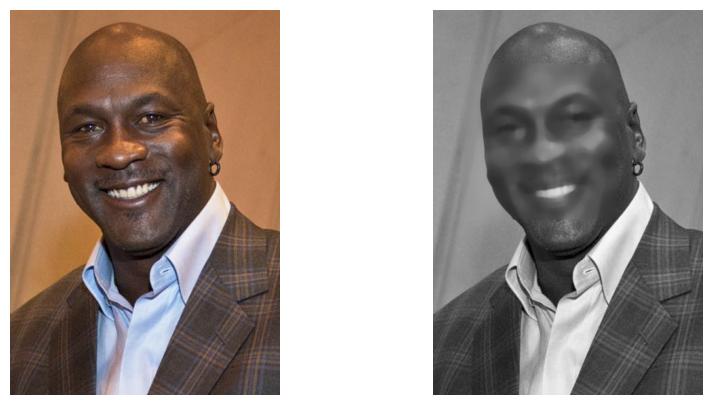

In [76]:
# Memuat file Haar Cascade untuk deteksi wajah
cascade_wajah = cv.CascadeClassifier('/content/drive/MyDrive/PCVK/Images/haarcascades/haarcascade_frontalface_alt.xml')

# Memuat gambar Jordan
jordan = cv.imread('/content/drive/MyDrive/PCVK/Images/facedet/mjordan.jpg')

# Menampilkan informasi efek blurring
print("Efek blurring pada wajah di gambar: mjordan.jpg")

# Mengubah gambar menjadi grayscale
gray = cv.cvtColor(jordan, cv.COLOR_BGR2GRAY)

# Menyimpan salinan asli gambar untuk tampilan sebelum blurring
jordan_before_blur = jordan.copy()

# Mendeteksi wajah dalam gambar
roi_wajah = cascade_wajah.detectMultiScale(gray)

# Melakukan blurring pada setiap wajah yang terdeteksi
for (x, y, w, h) in roi_wajah:
    face_roi = gray[y:y+h, x:x+w]  # Memotong wajah yang terdeteksi dari gambar grayscale
    blurred_face = cv.medianBlur(face_roi, 15)  # Menggunakan medianBlur untuk blurring
    gray[y:y+h, x:x+w] = blurred_face  # Mengganti wajah asli dengan wajah yang ter-blur

# Menampilkan gambar sebelum dan sesudah blurring wajah dalam grayscale
plt.figure(figsize=(10, 5))

# Gambar sebelum blurring (asal)
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(jordan_before_blur, cv.COLOR_BGR2RGB))  # Mengubah gambar ke RGB untuk ditampilkan
plt.axis('off')

# Gambar setelah blurring
plt.subplot(1, 2, 2)
plt.imshow(gray, cmap='gray')  # Menampilkan gambar grayscale setelah blurring
plt.axis('off')

# Menampilkan hasil
plt.show()

**7. Lakukan segmentasi karakter pada KTP.**

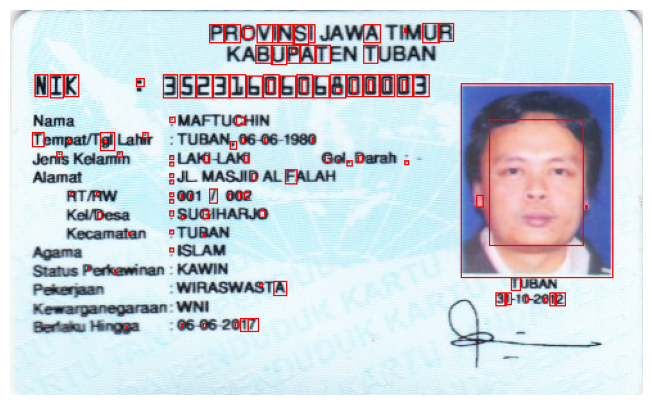

In [82]:
# Memuat gambar KTP
ktp = cv.imread('/content/drive/MyDrive/PCVK/Images/KTP_MORE/ktp3.png')

# Melakukan Gaussian Blur untuk mengurangi noise
blurred = cv.GaussianBlur(ktp, (5, 5), 0.5)

# Mengonversi gambar ke grayscale
gray = cv.cvtColor(blurred, cv.COLOR_BGR2GRAY)

# Melakukan thresholding dengan metode Otsu
ret, bw = cv.threshold(gray.copy(), 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# Melakukan erosi untuk menghilangkan noise lebih lanjut
erode = cv.erode(bw.copy(), cv.getStructuringElement(cv.MORPH_OPEN, (1, 1)))

# Ekstraksi kontur
contours, hierarchy = cv.findContours(erode.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

# Looping kontur untuk mendeteksi karakter
for cnt in contours:
    x, y, w, h = cv.boundingRect(cnt)
    ratio = format(w / h, '.2f')  # Rasio lebar terhadap tinggi kotak pembatas
    if h >= 4 and w >= 1 and float(ratio) <= 1:  # Kriteria untuk mendeteksi karakter
        cv.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 2 and w >= 1 and float(ratio) <= 1:  # Kriteria tambahan untuk deteksi karakter kecil
        cv.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

# Menampilkan gambar hasil segmentasi karakter
plt.figure(figsize=(10, 5))
plt.imshow(cv.cvtColor(ktp, cv.COLOR_BGR2RGB))  # Mengonversi ke RGB untuk tampilan matplotlib
plt.axis('off')
plt.show()

**8. Lakukan cropping pada bagian NIK saja.**

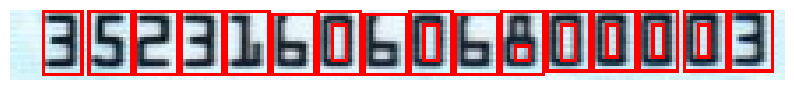

In [83]:
# Memuat gambar KTP
ktp = cv.imread('/content/drive/MyDrive/PCVK/Images/KTP_MORE/ktp3.png')

# Melakukan Gaussian Blur untuk mengurangi noise
blurred = cv.GaussianBlur(ktp, (5, 5), 0.5)

# Mengonversi gambar ke grayscale
gray = cv.cvtColor(blurred, cv.COLOR_BGR2GRAY)

# Melakukan thresholding dengan metode Otsu
ret, bw = cv.threshold(gray.copy(), 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# Melakukan erosi untuk menghilangkan noise lebih lanjut
erode = cv.erode(bw.copy(), cv.getStructuringElement(cv.MORPH_OPEN, (1, 1)))

# Ekstraksi kontur
contours, hierarchy = cv.findContours(erode.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

# Looping kontur untuk mendeteksi karakter
for cnt in contours:
    x, y, w, h = cv.boundingRect(cnt)
    ratio = format(w / h, '.2f')  # Rasio lebar terhadap tinggi kotak pembatas
    if h >= 4 and w >= 1 and float(ratio) <= 1:  # Kriteria untuk mendeteksi karakter
        cv.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 2 and w >= 1 and float(ratio) <= 1:  # Kriteria tambahan untuk deteksi karakter kecil
        cv.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

# Menentukan koordinat untuk memotong bagian NIK
cropped_img = ktp[50:70, 110:330]

# Menampilkan gambar hasil cropping NIK
plt.figure(figsize=(10, 5))
plt.imshow(cv.cvtColor(cropped_img, cv.COLOR_BGR2RGB))  # Mengonversi ke RGB untuk tampilan matplotlib
plt.axis('off')
plt.show()

**9. Kita akan menggunakan Deep Learning untuk melakukan pengenalan karakter. Sebelum melakukan training data, terlebih dahulu di siapkan data yang akan dilakukan training yaitu data image nomor angka 0-9. Untuk membuat data tersebut bisa gunakan image editor untuk dilakukan croping satu persatu. Kemudian selanjutnya gunakan source code di bawah ini untuk proses persiapan untuk training.**

In [85]:
# Import library tambahan
import os
import pickle
import tensorflow as tf
from keras.utils import to_categorical
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, ZeroPadding2D
from keras.models import Model
from keras.optimizers import Adam

In [86]:
# Load dataset MNIST
(X_train, y_train), (_, _) = tf.keras.datasets.mnist.load_data()

# Jumlah data yang ingin diambil dari setiap kategori
num_samples_per_class = 100

# List digit yang akan diambil (0 sampai 9)
digits_to_extract = list(range(10))

# Fungsi untuk mengambil sampel dari setiap kategori
def extract_samples(X, y, digits, num_samples):
    samples = []
    for digit in digits:
        digit_indices = np.where(y == digit)[0]
        selected_indices = np.random.choice(digit_indices, num_samples, replace=False)
        samples.extend([(X[i], digit) for i in selected_indices])
    return samples

# Ambil sampel dari setiap kategori
training_data = extract_samples(X_train, y_train, digits_to_extract, num_samples_per_class)

# Acak urutan data
np.random.shuffle(training_data)

# Pisahkan fitur dan label
X, Y = zip(*training_data)

# Konversi menjadi numpy array
X = np.array(X).reshape(-1, 28, 28, 1)

# Tulis ke file pickle
pickle_out = open("X_mnist.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("Y_mnist.pickle", "wb")
pickle.dump(to_categorical(Y, num_classes=10), pickle_out)
pickle_out.close()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


**Singkatnya:** Kode diatas bertujuan untuk mempersiapkan data pelatihan untuk model pengenalan karakter. Data gambar yang mewakili karakter `A-Z` dan `0-9` diubah menjadi array gambar dan dilabeli sesuai dengan karakter yang relevan. Variabel `X` dan `Y` menyimpan fitur (data gambar) dan label karakter masing-masing. Data pelatihan ini kemudian disimpan dalam file pickle yang dapat digunakan kembali untuk proses pelatihan model pengenalan karakter.

**10. Lakukan Training Data.**

Code berikut digunakan untuk melakukan training data:

In [87]:
import pickle
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input,
    ZeroPadding2D,
    Conv2D,
    MaxPooling2D,
    Flatten,
    Dense,
)
from tensorflow.keras.optimizers import Adam

# Load file pickle
pickle_in = open("X_mnist.pickle", "rb")
X = pickle.load(pickle_in)
pickle_in = open("Y_mnist.pickle", "rb")
Y = pickle.load(pickle_in)

# Normalize data if not already normalized
X = X / 255.0

width, height = 28, 28  # Sesuaikan dengan ukuran gambar MNIST

# Input layer
inputs = Input(shape=(width, height, 1))
conv_layer = ZeroPadding2D(padding=(2, 2))(inputs)
conv_layer = Conv2D(16, (5, 5), strides=(1, 1), activation="relu")(conv_layer)
conv_layer = MaxPooling2D((2, 2))(conv_layer)
conv_layer = Conv2D(32, (3, 3), strides=(1, 1), activation="relu")(conv_layer)
conv_layer = Conv2D(32, (3, 3), strides=(1, 1), activation="relu")(conv_layer)
conv_layer = MaxPooling2D((2, 2))(conv_layer)
conv_layer = Conv2D(64, (3, 3), strides=(1, 1), activation="relu")(conv_layer)
flaten = Flatten()(conv_layer)
fc_layer = Dense(256, activation="relu")(flaten)
fc_layer = Dense(64, activation="relu")(fc_layer)

# Output layer
outputs = Dense(10, activation="softmax")(fc_layer)

# Compile the model
adam = Adam(learning_rate=0.0001)
model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=adam, loss="categorical_crossentropy", metrics=["accuracy"])

# Train the model
model.fit(X, Y, epochs=20, verbose=1)

# Save the model in `.keras` format (recommended) or `.h5`
model.save("anpr.keras")  # Format native Keras
# model.save("anpr.h5")    # Format HDF5 (opsional)

Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.1540 - loss: 2.2905
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.2377 - loss: 2.2084
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.3781 - loss: 2.0183
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.5949 - loss: 1.5784
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.7232 - loss: 1.0488
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.7818 - loss: 0.7525
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.8392 - loss: 0.5375
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.8508 - loss: 0.4727
Epoch 9/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.8793 - loss: 0.4154
Epoch 10/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.8929 - loss: 0.3636
Epoch 11/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.8875 - loss: 0.3648
Epoch 12/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy:

**11. Testing Data.**

Contoh kode berikut digunakan untuk melakukan testing pengenalan karakter:

In [88]:
# Model disimpan dalam format .h5
model.save("anpr_model.h5")

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9546 - loss: 0.1711
Accuracy on the test set: 94.80%


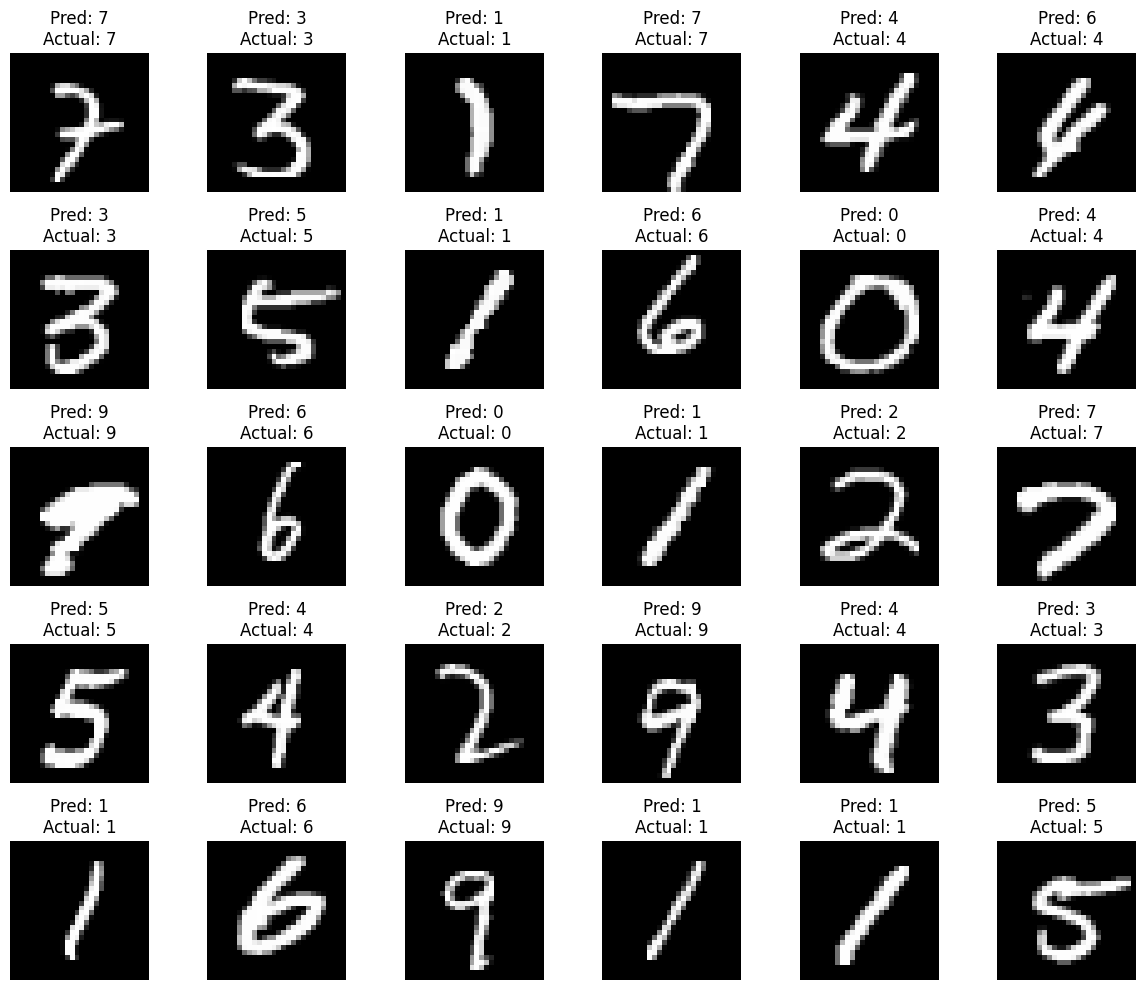

In [89]:
# Load dataset MNIST yang sudah disiapkan sebelumnya
pickle_in = open("X_mnist.pickle", "rb")
X_test = pickle.load(pickle_in)
pickle_in = open("Y_mnist.pickle", "rb")
Y_test = pickle.load(pickle_in)

# Normalisasi data testing
X_test = X_test / 255.0

# Load model yang sudah di-training sebelumnya
model = tf.keras.models.load_model("anpr_model.h5")  # Perbaiki dengan nama file model yang benar

# Lakukan prediksi pada data testing
predictions = model.predict(X_test)

# Evaluasi performa model
accuracy = model.evaluate(X_test, Y_test)[1]
print("Accuracy on the test set: {:.2f}%".format(accuracy * 100))

# Tampilkan 30 hasil uji dengan gambarnya
num_results_to_display = 30
fig, axes = plt.subplots(5, 6, figsize=(12, 10))

for i in range(num_results_to_display):
    predicted_label = np.argmax(predictions[i])
    actual_label = np.argmax(Y_test[i])

    # Ambil gambar dari data testing
    img = X_test[i].reshape((28, 28))  # Mengasumsikan gambar berukuran 28x28 pixels

    # Tampilkan gambar dan label
    axes[i // 6, i % 6].imshow(img, cmap='gray')
    axes[i // 6, i % 6].set_title(f'Pred: {predicted_label}\nActual: {actual_label}')
    axes[i // 6, i % 6].axis('off')

plt.tight_layout()
plt.show()

## **TUGAS**

---


Silahkan melakukan pengenalan NIK pada e-KTP yang terdapat pada tugas modul 11!

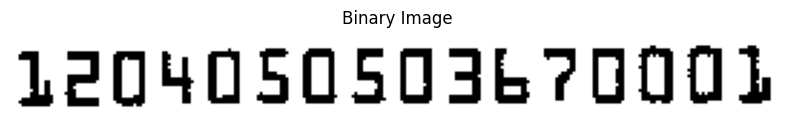

In [94]:
# TAHAP 1 - Preprocessing dan cropping NIK
# Membaca gambar input KTP
ktp = cv.imread('/content/drive/MyDrive/PCVK/Images/KTP_MORE/ktp5.png')

# Terapkan Gaussian Blur untuk mengurangi noise pada gambar
blurred = cv.GaussianBlur(ktp, (5, 5), 0.5)

# Mengubah gambar menjadi grayscale
gray = cv.cvtColor(blurred, cv.COLOR_BGR2GRAY)

# Terapkan thresholding Otsu untuk mendapatkan gambar biner
ret, bw = cv.threshold(gray.copy(), 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# Terapkan erosi untuk menghilangkan noise lebih lanjut
erode = cv.erode(bw.copy(), cv.getStructuringElement(cv.MORPH_OPEN, (1, 1)))

# Memotong gambar untuk mendapatkan area yang mengandung NIK
cropped_img = ktp[60:90, 140:410]

# Mengubah gambar yang dipotong menjadi grayscale
cropped_gray = cv.cvtColor(cropped_img, cv.COLOR_BGR2GRAY)

# Terapkan thresholding biner pada gambar yang telah dipotong
_, cropped_binary = cv.threshold(cropped_gray, 128, 255, cv.THRESH_BINARY)

# Menampilkan gambar biner
plt.figure(figsize=(10, 5))
plt.imshow(cropped_binary, cmap='gray')
plt.title('Binary Image')
plt.axis('off')
plt.show()

Detected : 16


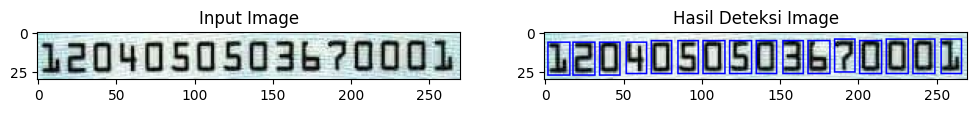

In [95]:
# TAHAP 2 - Deteksi Kontur Angka pada NIK
gray = cv.cvtColor(cropped_img, cv.COLOR_RGB2GRAY)
thresh = cv.threshold(gray, 0, 255, cv.THRESH_BINARY | cv.THRESH_OTSU)[1]

# Membuat kernel untuk operasi morfologi
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (1, 5))

# Terapkan operasi morfologi untuk membersihkan hasil thresholding
thresh = cv.morphologyEx(thresh, cv.MORPH_OPEN, kernel)

# Mencari kontur pada gambar threshold
contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

# Menyiapkan gambar untuk menggambar kontur yang terdeteksi
detected = cropped_img.copy()
nums = []

# Mengiterasi setiap kontur untuk mendeteksi angka
for contour in contours:
    x, y, w, h = cv.boundingRect(contour)

    # Memfilter kontur berdasarkan ukuran lebar (w) agar hanya angka yang terdeteksi
    if w >= 10 and w <= 20:
        cv.rectangle(detected, (x, y), (x + w, y + h), (255, 0, 0), 1)
        num = cropped_img[y:y + h, x:x + w].copy()
        nums.append(num)

# Menampilkan gambar input dan gambar hasil deteksi angka
print(f'Detected : {len(nums)}')
plt.figure(figsize=(12, 8))
plt.subplot(121), plt.imshow(cv.cvtColor(cropped_img, cv.COLOR_BGR2RGB), cmap='gray'), plt.title('Input Image')
plt.subplot(122), plt.imshow(cv.cvtColor(detected, cv.COLOR_BGR2RGB), cmap='gray'), plt.title('Hasil Deteksi Image')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


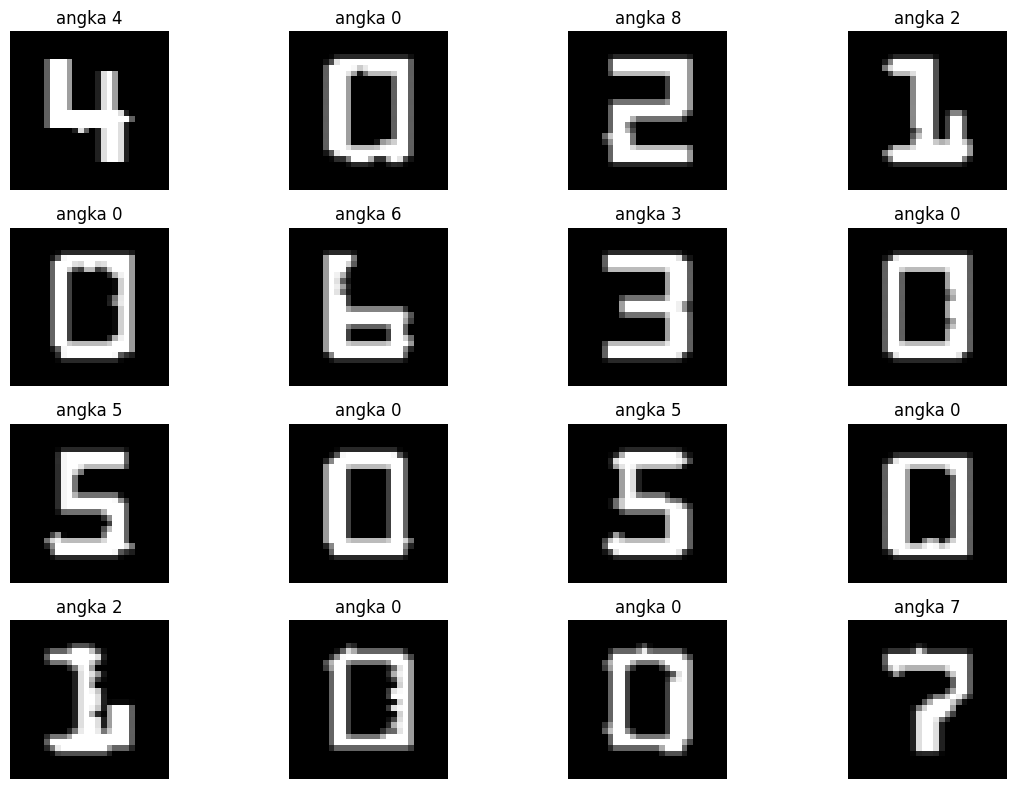

In [99]:
from sklearn.decomposition import PCA
from tensorflow.keras.models import load_model

# TAHAP 3 - Pengenalan Karakter menggunakan PCA
# Memuat model yang telah dilatih untuk pengenalan angka (model harus sudah dilatih)
model = load_model('/content/anpr_model.h5')  # Ganti dengan path model yang sudah dilatih

# Membuat figure untuk menampilkan hasil prediksi
fig, axes = plt.subplots(4, 4, figsize=(12, 8))

# Mengiterasi setiap angka yang terdeteksi
for i, num in enumerate(nums):
    # Mengubah gambar angka menjadi grayscale
    num = cv.cvtColor(num, cv.COLOR_BGR2GRAY)

    # Terapkan thresholding biner
    ret, thresh = cv.threshold(num, 127, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)

    # Menambahkan border pada gambar untuk menyamakan ukuran
    top, bottom, left, right = 4, 4, 4, 4
    num = cv.copyMakeBorder(thresh, top, bottom, left, right, cv.BORDER_CONSTANT, value=(0, 0, 0))

    # Mengubah ukuran gambar menjadi 28x28 untuk kecocokan dengan model
    num = cv.resize(num, (28, 28))
    num = np.array(num) / 255.0  # Normalisasi nilai pixel

    # PCA untuk ekstraksi fitur
    num_vector = num.reshape((-1, 1))
    pca = PCA(n_components=1)
    num_pca = pca.fit_transform(num_vector)
    num_upscaled = num_pca.reshape(-1, 28, 28, 1)

    # Melakukan prediksi menggunakan model yang telah dilatih
    pred = model.predict(num_upscaled)
    pred = np.argmax(pred)  # Menyimpan angka dengan probabilitas tertinggi

    # Menampilkan hasil prediksi
    axes[i // 4, i % 4].imshow(num_upscaled.reshape(num.shape), cmap='gray')
    axes[i // 4, i % 4].set_title(f'angka {pred}')
    axes[i // 4, i % 4].axis('off')

# Menampilkan hasil semua prediksi dalam satu gambar
plt.tight_layout()
plt.show()